# 城市气候与海洋的关系研究

#### 导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob

#### 导入数据各个海滨城市数据

In [3]:
glob.glob('./*.csv')

['.\\asti_150715.csv',
 '.\\asti_250715.csv',
 '.\\asti_270615.csv',
 '.\\bologna_150715.csv',
 '.\\bologna_250715.csv',
 '.\\bologna_270615.csv',
 '.\\cesena_150715.csv',
 '.\\cesena_250715.csv',
 '.\\cesena_270615.csv',
 '.\\faenza_150715.csv',
 '.\\faenza_250715.csv',
 '.\\faenza_270615.csv',
 '.\\ferrara_150715.csv',
 '.\\ferrara_250715.csv',
 '.\\ferrara_270615.csv',
 '.\\mantova_150715.csv',
 '.\\mantova_250715.csv',
 '.\\mantova_270615.csv',
 '.\\milano_150715.csv',
 '.\\milano_250715.csv',
 '.\\milano_270615.csv',
 '.\\piacenza_150715.csv',
 '.\\piacenza_250715.csv',
 '.\\piacenza_270615.csv',
 '.\\ravenna_150715.csv',
 '.\\ravenna_250715.csv',
 '.\\ravenna_270615.csv',
 '.\\torino_150715.csv',
 '.\\torino_250715.csv',
 '.\\torino_270615.csv']

In [4]:
files = glob.glob('./*.csv')
df = DataFrame()
for file in files:
    temp = pd.read_csv(file)
    df = df.append(temp, ignore_index=True)

In [5]:
df.head()

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315


#### 查看行数

In [6]:
df.shape

(675, 11)

#### 去除没用的列

In [7]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
df

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315
5,32.95,46,1016.0,few clouds,1436881329,2.10,110.000,Asti,2015-07-14 15:42:09,315
6,34.31,46,1015.0,few clouds,1436884929,2.10,100.000,Asti,2015-07-14 16:42:09,315
7,32.47,49,1015.0,few clouds,1436888513,2.10,100.000,Asti,2015-07-14 17:41:53,315
8,34.28,46,1015.0,few clouds,1436892132,1.50,100.000,Asti,2015-07-14 18:42:12,315
9,31.41,46,1014.0,Sky is Clear,1436895723,2.10,240.000,Asti,2015-07-14 19:42:03,315


#### 各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [9]:
city_dist = df['dist'].unique()
city_dist


array([315,  71,  14,  37,  47, 121, 250, 200,   8, 357], dtype=int64)

In [10]:
temp_max = df.groupby(by='city')['temp'].max()
temp_max

city
Asti        34.31
Bologna     33.85
Cesena      32.81
Faenza      32.74
Ferrara     33.43
Mantova     34.18
Milano      34.81
Piacenza    33.92
Ravenna     32.79
Torino      34.69
Name: temp, dtype: float64

In [11]:
temp_min = df.groupby(by='city')['temp'].min()
temp_min

city
Asti        18.01
Bologna     18.44
Cesena      18.41
Faenza      18.62
Ferrara     18.81
Mantova     19.03
Milano      18.28
Piacenza    18.68
Ravenna     18.22
Torino      18.94
Name: temp, dtype: float64

In [12]:
humidity_max = df.groupby(by='city')['humidity'].max()
humidity_max

city
Asti         93
Bologna      92
Cesena      100
Faenza      100
Ferrara      85
Mantova     100
Milano      100
Piacenza    100
Ravenna      94
Torino       88
Name: humidity, dtype: int64

In [13]:
humidity_min = df.groupby(by='city')['humidity'].min()
humidity_min

city
Asti        29
Bologna     40
Cesena      61
Faenza      61
Ferrara     39
Mantova     28
Milano      35
Piacenza    35
Ravenna     34
Torino      45
Name: humidity, dtype: int64

#### 显示最高温度与离海远近的关系

In [14]:
import seaborn as sns

In [15]:
sns.set(style='darkgrid')

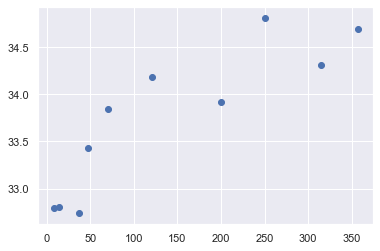

In [16]:
plt.scatter(y=temp_max, x=city_dist)

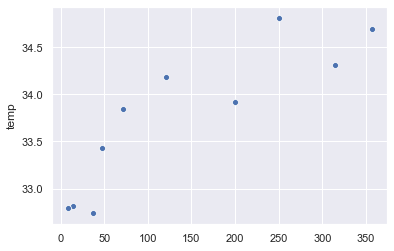

In [17]:
_ = sns.scatterplot(city_dist, temp_max)

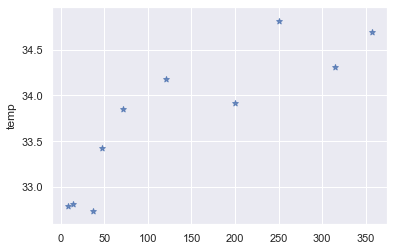

In [18]:
_ = sns.regplot(city_dist, temp_max, marker='*',fit_reg=False)

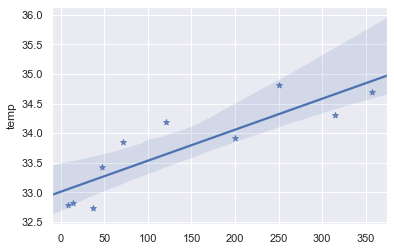

In [19]:
sns.regplot(city_dist, temp_max, marker='*')


观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [20]:
dist_near = city_dist[city_dist < 100]
temp_near = temp_max[city_dist < 100]

In [21]:
dist_far = city_dist[city_dist > 50]
temp_far = temp_max[city_dist > 50]

#### 使用支持向量机计算回归参数

In [22]:
from sklearn.svm import SVR

In [23]:
dist_near.reshape(-1,1)

array([[71],
       [14],
       [37],
       [47],
       [ 8]], dtype=int64)

In [24]:
temp_near.values.reshape(-1,1)

array([[33.85],
       [32.81],
       [32.74],
       [33.43],
       [32.79]])

In [25]:
svr_near = SVR(kernel='linear')
svr_near.fit(dist_near.reshape(-1,1), temp_near.values.reshape(-1,1))

d:\envs\envspider\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
x_test_near = np.linspace(0,150,100).reshape(-1,1)
y_ = svr_near.predict(x_test_near)

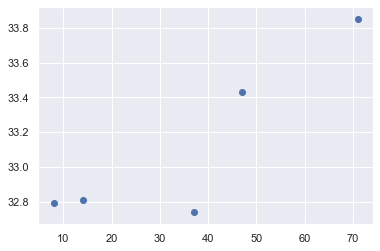

In [27]:
plt.scatter(dist_near, temp_near)

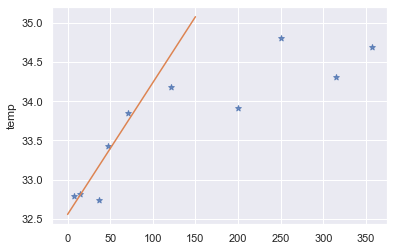

In [28]:
sns.regplot(city_dist, temp_max, marker='*',fit_reg=False)
# plt.scatter(city_dist, temp_max)
_ = plt.plot(x_test_near, y_)

In [29]:
svr_far = SVR(kernel='linear')
svr_far.fit(dist_far.reshape(-1,1), temp_far.values.reshape(-1,1))

d:\envs\envspider\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
x_test_far = np.linspace(100,400,100).reshape(-1,1)
y1_ = svr_far.predict(x_test_far)

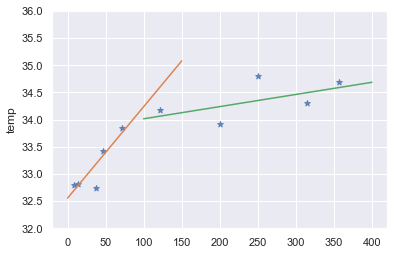

In [31]:
sns.regplot(city_dist, temp_max, marker='*',fit_reg=False)
# plt.scatter(city_dist, temp_max)
plt.ylim(32, 36)
plt.plot(x_test_near, y_)
plt.plot(x_test_far, y1_)

#### 查看最低温度与海洋距离的关系

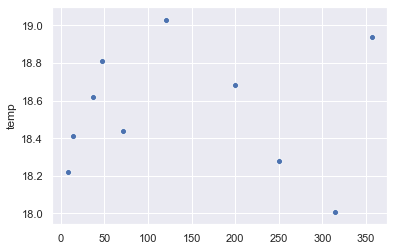

In [32]:
sns.scatterplot(city_dist, temp_min)

#### 最低湿度与海洋距离的关系

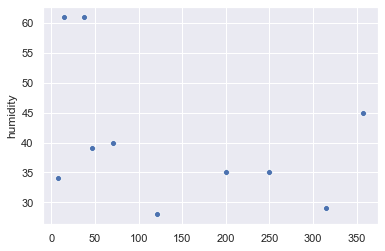

In [33]:
sns.scatterplot(city_dist, humidity_min)

#### 最高湿度与海洋距离的关系

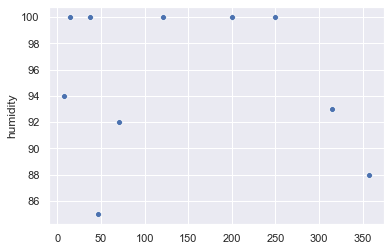

In [34]:
sns.scatterplot(city_dist, humidity_max)

#### 平均湿度与海洋距离的关系

In [35]:
humidity_mean = df.groupby(by='city')[['humidity']].mean()

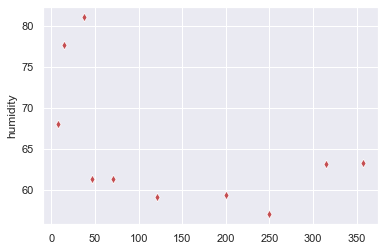

In [36]:
sns.scatterplot(city_dist, humidity_mean['humidity'], marker='d', color='r')

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

#### 风向与风速的关系

In [37]:
df.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315


In [38]:
df[['wind_deg','wind_speed']].head(10)

,wind_deg,wind_speed
0,42.501,2.57
1,263.000,1.54
2,100.000,2.60
3,90.000,2.10
4,120.000,2.10
5,110.000,2.10
6,100.000,2.10
7,100.000,2.10
8,100.000,1.50
9,240.000,2.10


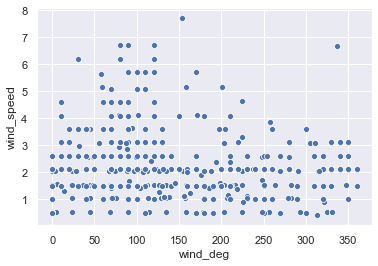

In [39]:
sns.scatterplot(df['wind_deg'],df['wind_speed'])

#### 在子图中，同时比较风向与湿度和风力的关系

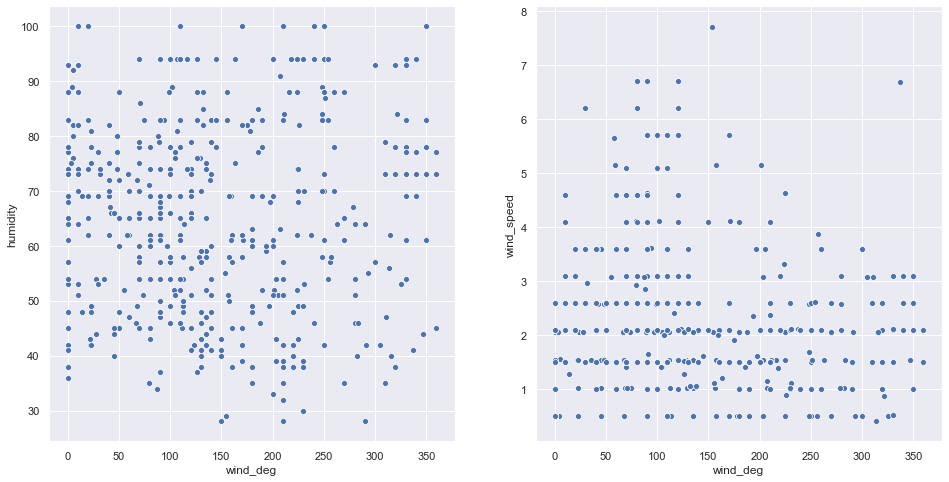

In [40]:
plt.figure(figsize=(2*8,8))
axes1= plt.subplot(1,2,1)

sns.scatterplot(df['wind_deg'],df['humidity'])
axes2= plt.subplot(1,2,2)
sns.scatterplot(df['wind_deg'],df['wind_speed'])

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

#### 用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [41]:
df['city'].unique()

array(['Asti', 'Bologna', 'Cesena', 'Faenza', 'Ferrara', 'Mantova',
       'Milano', 'Piacenza', 'Ravenna', 'Torino'], dtype=object)

In [42]:
Milano = df[df['city'] == 'Milano']
Milano.tail()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
468,20.27,68,1017.0,Sky is Clear,1435453226,2.6,90.0,Milano,2015-06-28 03:00:26,250
469,19.62,72,1017.0,Sky is Clear,1435456482,2.6,50.0,Milano,2015-06-28 03:54:42,250
470,18.68,72,1017.0,Sky is Clear,1435460036,2.6,40.0,Milano,2015-06-28 04:53:56,250
471,18.28,72,1017.0,Sky is Clear,1435463874,2.6,40.0,Milano,2015-06-28 05:57:54,250
472,18.86,77,1017.0,Sky is Clear,1435467177,0.5,0.0,Milano,2015-06-28 06:52:57,250


In [43]:
milano_deg_data, _ = np.histogram(Milano['wind_deg'].values, bins=8, range=[0,360])
milano_deg_data

array([21,  9,  9,  6, 14,  3,  2,  2], dtype=int64)

In [44]:
# degree = np.arange(0, 2*np.pi, 2*np.pi/8)
degree = np.arange(0,360,45)
degree

array([  0,  45,  90, 135, 180, 225, 270, 315])

In [45]:
from pyecharts.charts import Bar

In [46]:
milano_deg_data

array([21,  9,  9,  6, 14,  3,  2,  2], dtype=int64)

In [47]:
bar = Bar()
bar.add_xaxis(degree.tolist())

bar.add_yaxis("各方向刮风次数",milano_deg_data.tolist())
bar.render_notebook()

#### pyecharts 例子
```
from pyecharts.charts import Bar

bar = Bar()

bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])

bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
bar.render()
```
render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
也可以传入路径参数，如 bar.render("mycharts.html")

bar.rander_notebook() 可以在jupyter中直接显示


#### 计算米兰各个方向上的风速

#### 将各个方向的风速保存在列表中

In [48]:
conn_45 = Milano['wind_deg'] < 45

In [49]:
Milano[conn_45]['wind_speed'].mean()

1.8142857142857143

In [50]:
for conn_deg in range(45, 360, 45):
    print(conn_deg)

45
90
135
180
225
270
315


In [51]:
lst = []
for conn_deg in range(45, 360+45, 45):
    #  不能直接  conn_deg - 45  <= Milano['wind_deg'] < conn_deg - 45
    conn = (Milano['wind_deg'] >= conn_deg - 45)  & (Milano['wind_deg'] < conn_deg)
    lst.append(Milano[conn]['wind_speed'].mean())
lst    

[1.8142857142857143,
 2.2222222222222223,
 2.855555555555556,
 2.583333333333333,
 2.3285714285714287,
 2.266666666666667,
 2.05,
 2.1]

#### 画出各个方向的风速

Text(0.5, 1.05, 'Milano speed wind')

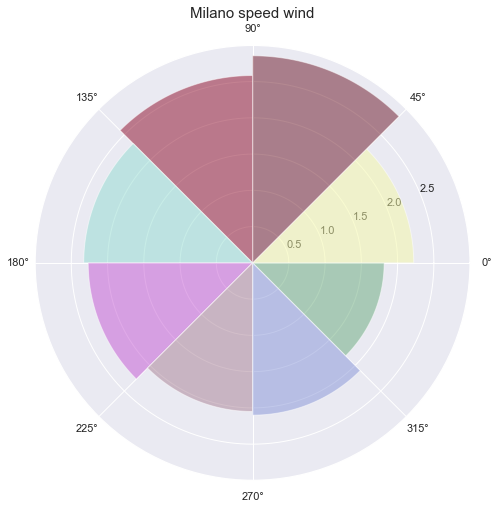

In [52]:
plt.figure(figsize=(8,8))
plt.subplot(projection='polar')
degree = np.arange(0, 2*np.pi, 2*np.pi/8)

#  玫瑰图下面的字被挡住了
# color=np.concatenate((np.random.rand(8, 3), np.full((8,1),[0.9])), axis=1)  # 颜色随机并透明 10% 
color=np.random.rand(8, 3)
plt.bar(degree-np.pi/8, lst,width=np.pi/4,color=color, alpha=0.5)  # 调整图形和画布的关系
plt.title('Milano speed wind', fontdict=dict(size=15))

#### 将上面步骤写成函数

In [53]:
def speed_wind(cityname):
    city = df[df['city'] == cityname]
    lst = []
    for conn_deg in range(45, 360+45, 45):
        #  不能直接  conn_deg - 45  <= Milano['wind_deg'] < conn_deg - 45
        conn = (city['wind_deg'] >= conn_deg - 45)  & (city['wind_deg'] < conn_deg)
        lst.append(city[conn]['wind_speed'].mean())
    plt.figure(figsize=(8,8))
    plt.subplot(projection='polar')
    degree = np.arange(0, 2*np.pi, 2*np.pi/8)
    #  玫瑰图下面的字被挡住了
    color=np.concatenate((np.random.rand(8, 3), np.full((8,1),[0.9])), axis=1)  # 颜色随机并透明 10% 
    plt.bar(degree-np.pi/8, lst,width=np.pi/4,color=color)
    plt.title(f'{cityname} speed wind', fontdict=dict(size=15))

In [54]:
df['city'].unique()

array(['Asti', 'Bologna', 'Cesena', 'Faenza', 'Ferrara', 'Mantova',
       'Milano', 'Piacenza', 'Ravenna', 'Torino'], dtype=object)

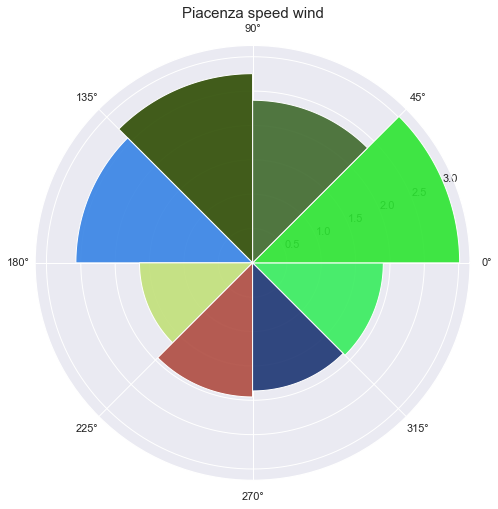

In [55]:
speed_wind('Piacenza')